9.0
3.0
7.0
5.0


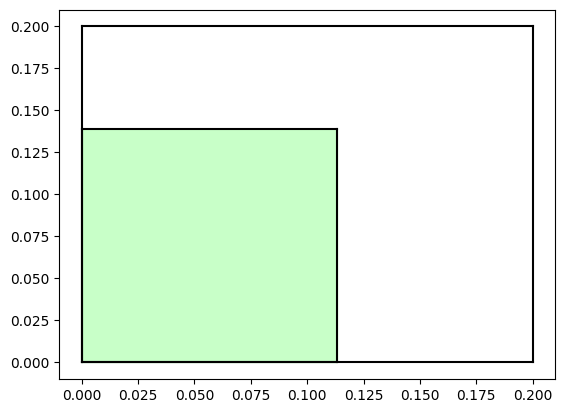

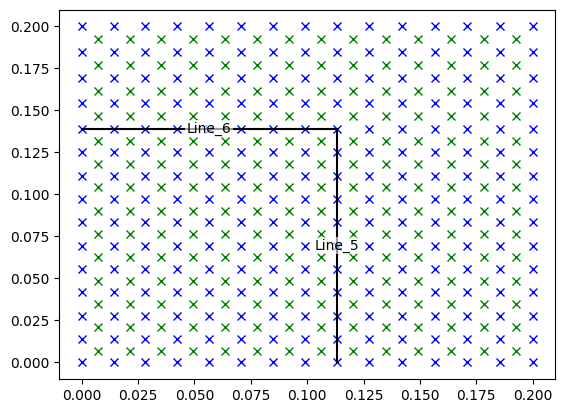

In [7]:
import fluid_fvm.physics as ph
import matplotlib.pyplot as plt
import fluid_fvm.geometry as geo
import fluid_fvm.project as pr
import fluid_fvm.mesh as ms
import fluid_fvm.discretization as dc
import numpy as np
a = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Vector(0,0),geo.Vector(0.113,0),geo.Vector(0.113,0.139), geo.Vector(0,0.139)])])
a.assemble()
fig, ax = plt.subplots()

a.plot(ax)

mesh_c_full = ms.RectangularSnappingConfig(15,15)
mat = pr.Material("test", mu = 1, rho = 156, gamma = 1,color = "#ffbbcc")
mat2 = pr.Material("test2", mu = 1, rho = 1056, gamma = 1, color = "#ff11cc")

comp = pr.Component()

comp.setAssembly(a)
comp.assignMaterial("Polygon_0", mat)
comp.assignMaterial("Polygon_1", mat2)

comp.setMesh(mesh_c_full)


fig, ax = plt.subplots()

mesh_c_full.plotMesh(ax)
for line in mesh_c_full.snapLines:
    line.plot(ax)


Node:0  Neighbour: 0 Nwighbour idx: []
Self[[2.0323741]]
Neighbour:0
Const:[[0.]]
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[0.9840708]]
Neighbour:[[-0.9840708]]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 14
Self[[1.01618705]]
Neighbour:[[-1.01618705]]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self0
Neighbour:0
Const:0.0
---------------
Node:1  Neighbour: 0 Nwighbour idx: []
Self[[2.0323741]]
Neighbour:0
Const:[[0.]]
---------------
Node:1  Neighbour: 1 Nwighbour idx: 2
Self[[0.9840708]]
Neighbour:[[-0.9840708]]
Const:0
---------------
Node:1  Neighbour: 2 Nwighbour idx: 15
Self[[1.01618705]]
Neighbour:[[-1.01618705]]
Const:0
---------------
Node:1  Neighbour: 3 Nwighbour idx: 0
Self[[0.9840708]]
Neighbour:[[-0.9840708]]
Const:0
---------------
Node:2  Neighbour: 0 Nwighbour idx: []
Self[[2.0323741]]
Neighbour:0
Const:[[0.]]
---------------
Node:2  Neighbour: 1 Nwighbour idx: 3
Self[[0.9840708]]
Neighbour:[[-0.9840708]]
Const:0
---

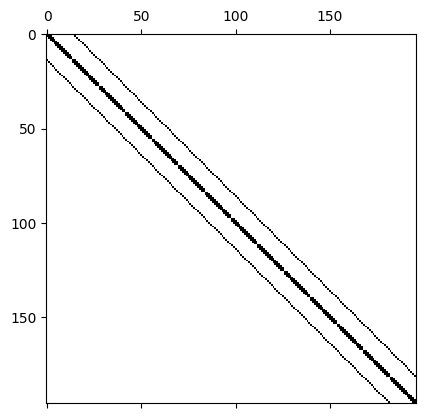

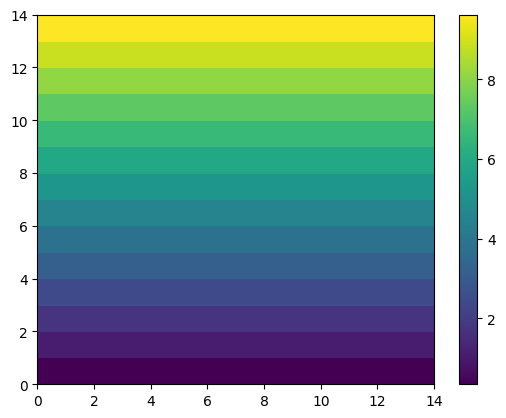

In [8]:
bcdict = {"Line_0" : ph.Boundary("Dirichlet", 0),
          "Line_1" : ph.Boundary("Neumann", 0),
          "Line_2" : ph.Boundary("Dirichlet", 10),
          "Line_3" : ph.Boundary("Neumann", 0),}


flowDirection = geo.Vector(x=1,y = 0)
c = ph.HeatTransfer(a, bcdict)


comp.setPhysics(c)
disc = dc.LinearFullDiscretizer(comp,1)
disc.discretize()
plt.spy(disc.Amrx)
res_math = np.linalg.solve(disc.Amrx, disc.Bmrx)


res = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res[mesh_c_full.math2geoVolume(i)] = res_math[i]

fig, ax = plt.subplots()

pl = plt.pcolor(res)
fig.colorbar(pl,)